In [1]:
import pandas as pd;
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/rohit/DataSet/Clean_dataset/movies_clean.csv")

In [5]:
df.head()

,Unnamed: 0,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy


In [6]:
df.describe()

,Unnamed: 0,movieId
count,62000.000000,62000.000000
mean,31186.263774,122129.922113
std,18016.957493,63293.663238
min,0.000000,1.000000
25%,15572.750000,82029.000000
50%,31186.500000,137965.000000
75%,46762.250000,173113.500000
max,62422.000000,209171.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62000 entries, 0 to 61999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  62000 non-null  int64 
 1   movieId     62000 non-null  int64 
 2   title       62000 non-null  object
 3   genres      62000 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [3]:
df_5Kmovies = df.iloc[0:5000]

In [4]:
df_5Kmovies.describe()

,Unnamed: 0,movieId
count,5000.000000,5000.000000
mean,2514.127800,2586.379600
std,1450.954291,1484.992288
min,0.000000,1.000000
25%,1256.750000,1289.750000
50%,2518.500000,2609.500000
75%,3769.250000,3872.250000
max,5023.000000,5129.000000


In [14]:
%matplotlib inline
import wordcloud
from wordcloud import WordCloud,STOPWORDS

title_corpus = ' '.join(df_5Kmovies['title'])


In [15]:
title_corpus

"Toy Story (1995) Jumanji (1995) Grumpier Old Men (1995) Waiting to Exhale (1995) Father of the Bride Part II (1995) Heat (1995) Sabrina (1995) Tom and Huck (1995) Sudden Death (1995) GoldenEye (1995) American President, The (1995) Dracula: Dead and Loving It (1995) Balto (1995) Nixon (1995) Cutthroat Island (1995) Casino (1995) Sense and Sensibility (1995) Four Rooms (1995) Ace Ventura: When Nature Calls (1995) Money Train (1995) Get Shorty (1995) Copycat (1995) Assassins (1995) Powder (1995) Leaving Las Vegas (1995) Othello (1995) Now and Then (1995) Persuasion (1995) City of Lost Children, The (Cité des enfants perdus, La) (1995) Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) Dangerous Minds (1995) Twelve Monkeys (a.k.a. 12 Monkeys) (1995) Wings of Courage (1995) Babe (1995) Carrington (1995) Dead Man Walking (1995) Across the Sea of Time (1995) It Takes Two (1995) Clueless (1995) Cry, the Beloved Country (1995) Richard III (1995) Dead Presidents (1995) Restoration (1995) Mort

In [16]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)


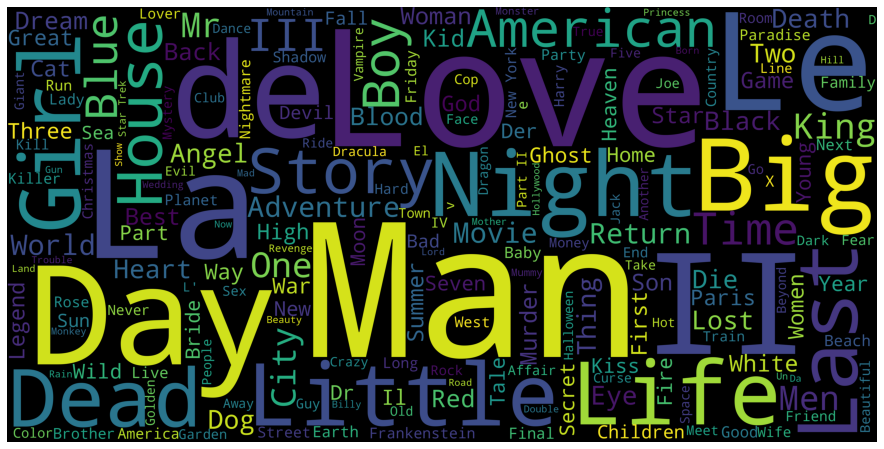

In [17]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [6]:
genre_labels = set()

In [7]:
for s in df_5Kmovies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [8]:
genre_labels

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [9]:
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(df_5Kmovies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 2407],
 ['Comedy', 1758],
 ['Romance', 826],
 ['Thriller', 816],
 ['Action', 685]]

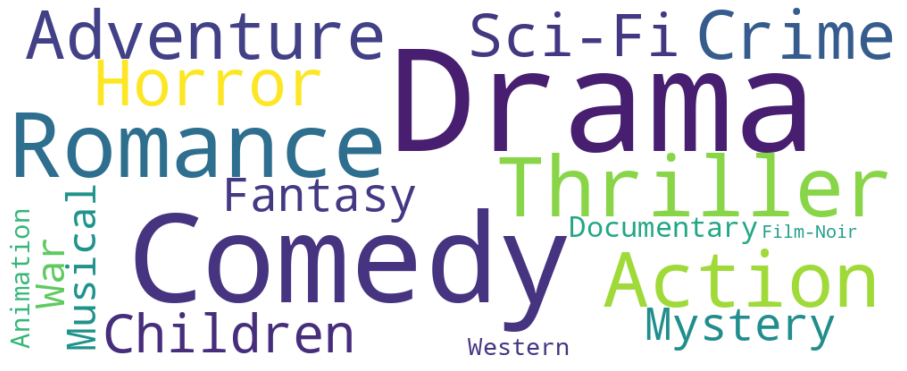

In [29]:
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_5Kmovies['genres'])
tfidf_matrix.shape

(5000, 147)

In [11]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.31727632, 0.05999564, 0.05204088],
       [0.31727632, 1.        , 0.        , 0.        ],
       [0.05999564, 0.        , 1.        , 0.35544121],
       [0.05204088, 0.        , 0.35544121, 1.        ]])

In [27]:
# Build a 1-dimensional array with movie titles
titles = df_5Kmovies['title']
indices = pd.Series(df_5Kmovies.index, index=df_5Kmovies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]
genre_recommendations('Toy Story (1995)')

2185                                          Antz (1998)
3001                                   Toy Story 2 (1999)
3633       Adventures of Rocky and Bullwinkle, The (2000)
3892                     Emperor's New Groove, The (2000)
4757                                Monsters, Inc. (2001)
4179                                         Shrek (2001)
2036                             American Tail, An (1986)
2246                                 Bug's Life, A (1998)
4861                     Jimmy Neutron: Boy Genius (2001)
660                                      Space Jam (1996)
12                                           Balto (1995)
1981    101 Dalmatians (One Hundred and One Dalmatians...
1985                      Rescuers Down Under, The (1990)
2787                            Gulliver's Travels (1939)
3496                                      Dinosaur (2000)
3821                            Digimon: The Movie (2000)
4979                          Return to Never Land (2002)
580           

In [28]:
titles

0                         Toy Story (1995)
1                           Jumanji (1995)
2                  Grumpier Old Men (1995)
3                 Waiting to Exhale (1995)
4       Father of the Bride Part II (1995)
                       ...                
4995                      Used Cars (1980)
4996             Deadly Mantis, The (1957)
4997                      Dragonfly (2002)
4998            Queen of the Damned (2002)
4999                   Big Bad Love (2001)
Name: title, Length: 5000, dtype: object

In [29]:
df_5Kmovies.index

RangeIndex(start=0, stop=5000, step=1)

In [31]:
indices = pd.Series(df_5Kmovies.index, index=df_5Kmovies['title'])

In [32]:
indices

title
Toy Story (1995)                         0
Jumanji (1995)                           1
Grumpier Old Men (1995)                  2
Waiting to Exhale (1995)                 3
Father of the Bride Part II (1995)       4
                                      ... 
Used Cars (1980)                      4995
Deadly Mantis, The (1957)             4996
Dragonfly (2002)                      4997
Queen of the Damned (2002)            4998
Big Bad Love (2001)                   4999
Length: 5000, dtype: int64

In [33]:
titles

0                         Toy Story (1995)
1                           Jumanji (1995)
2                  Grumpier Old Men (1995)
3                 Waiting to Exhale (1995)
4       Father of the Bride Part II (1995)
                       ...                
4995                      Used Cars (1980)
4996             Deadly Mantis, The (1957)
4997                      Dragonfly (2002)
4998            Queen of the Damned (2002)
4999                   Big Bad Love (2001)
Name: title, Length: 5000, dtype: object

In [34]:
df_5Kmovies

,Unnamed: 0,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
4995,5019,5125,Used Cars (1980),Comedy
4996,5020,5126,"Deadly Mantis, The (1957)",Horror|Sci-Fi
4997,5021,5127,Dragonfly (2002),Drama|Fantasy|Mystery|Romance|Thriller
4998,5022,5128,Queen of the Damned (2002),Fantasy|Horror


In [35]:
df.head()

,Unnamed: 0,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy


In [42]:
df[df['title']=='Toy Story']

,Unnamed: 0,movieId,title,genres


In [43]:
movie = pd.read_csv("/home/rohit/DataSet/Clean_dataset/movies_features_clean.csv")

In [44]:
movie.head()

,Unnamed: 0,index,adult,id,imdb_id,original_language,overview,popularity,poster_path,runtime,spoken_languages,title,vote_average,vote_count,_merge
0,0,0,False,525153,tt0094878,en,"During the Second World War, tens of thousands...",1.201,/emSTzEr2qdo3lV14ZQ3uIYsqHJS.jpg,101.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Shadows,0.0,0.0,left_only
1,1,1,False,503475,NaN,en,Anthology of Aardman Animation short films rel...,2.272,/tWkYclnnChwoMMBFECsEjd5hb77.jpg,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Wallace & Gromit: The Best of Aardman Animation,7.5,2.0,left_only
2,2,2,False,581579,tt0116992,en,Following the life of Marlene Dietrich through...,0.600,/faHxYNlQ7RGDtqmaNBpFf0HKozg.jpg,52.0,[],Marlene Dietrich: Shadows and Light,0.0,0.0,left_only
3,3,3,False,525936,tt0112746,en,Lonely Kansas housewife Karen Webb despondent ...,0.841,NaN,81.0,[],The Crude Oasis,0.0,0.0,left_only
4,4,4,False,484245,tt0116536,en,Back in the stone aged we all went to San Fran...,0.655,/p5SC0B48GKtwOMLVK0qdY4p164F.jpg,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Hippie Revolution,0.0,0.0,left_only


In [45]:
df.head()

,Unnamed: 0,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy


In [58]:
x=[]
for i in df['title'].values:
    x.append(i.split('(')[0])

In [60]:
xi = pd.Series(x)

In [62]:
xi

0                          Toy Story 
1                            Jumanji 
2                   Grumpier Old Men 
3                  Waiting to Exhale 
4        Father of the Bride Part II 
                     ...             
61995                             We 
61996             Window of the Soul 
61997                      Bad Poems 
61998                   A Girl Thing 
61999        Women of Devil's Island 
Length: 62000, dtype: object

In [63]:
df['title1'] = xi

In [64]:
df.head()

,Unnamed: 0,movieId,title,genres,title1
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji
2,2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale
4,4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II


In [70]:
df1 = df.drop(['title','Unnamed: 0'],axis=1)

In [71]:
df1.head()

,movieId,genres,title1
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story
1,2,Adventure|Children|Fantasy,Jumanji
2,3,Comedy|Romance,Grumpier Old Men
3,4,Comedy|Drama|Romance,Waiting to Exhale
4,5,Comedy,Father of the Bride Part II


In [73]:
df2 = df1.rename({'title1': 'title'}, axis=1) 

In [74]:
df2

,movieId,genres,title
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story
1,2,Adventure|Children|Fantasy,Jumanji
2,3,Comedy|Romance,Grumpier Old Men
3,4,Comedy|Drama|Romance,Waiting to Exhale
4,5,Comedy,Father of the Bride Part II
...,...,...,...
61995,209157,Drama,We
61996,209159,Documentary,Window of the Soul
61997,209163,Comedy|Drama,Bad Poems
61998,209169,(no genres listed),A Girl Thing


In [75]:
df2.to_csv("movies_and_genre",index=False)

In [79]:
df2[df2['title'].notnull()]

,movieId,genres,title
0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story
1,2,Adventure|Children|Fantasy,Jumanji
2,3,Comedy|Romance,Grumpier Old Men
3,4,Comedy|Drama|Romance,Waiting to Exhale
4,5,Comedy,Father of the Bride Part II
...,...,...,...
61995,209157,Drama,We
61996,209159,Documentary,Window of the Soul
61997,209163,Comedy|Drama,Bad Poems
61998,209169,(no genres listed),A Girl Thing


In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62000 entries, 0 to 61999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62000 non-null  int64 
 1   genres   62000 non-null  object
 2   title    62000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [81]:
movies = pd.read_csv("movies_and_genre")

In [83]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62000 entries, 0 to 61999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62000 non-null  int64 
 1   genres   62000 non-null  object
 2   title    61993 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [87]:
movies[movies['title'].isnull()]

,movieId,genres,title
13445,69757,Comedy|Drama|Romance,NaN
15221,80729,Comedy|Drama,NaN
22359,115263,Documentary,NaN
34360,145733,Adventure|Children,NaN
34927,147033,Documentary|Thriller,NaN
40438,160010,Documentary,NaN
55632,193219,Comedy|Romance,NaN


In [89]:
df2[df2['movieId']==69757]

,movieId,genres,title
13445,69757,Comedy|Drama|Romance,


In [90]:
df2[df2['title'].isnull()]

,movieId,genres,title


In [92]:
df[df['movieId']==145733]

,Unnamed: 0,movieId,title,genres,title1
34360,34557,145733,(The New) War of the Buttons (2011),Adventure|Children,


In [93]:
df.loc[df['movieId']==145733]

,Unnamed: 0,movieId,title,genres,title1
34360,34557,145733,(The New) War of the Buttons (2011),Adventure|Children,


In [97]:
df.iloc[34360]['title']='The New War of the Buttons (2011)'

<ipython-input-97-5924b3d639bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[34360]['title']='The New War of the Buttons (2011)'


In [98]:
df[df['movieId']==145733]

,Unnamed: 0,movieId,title,genres,title1
34360,34557,145733,(The New) War of the Buttons (2011),Adventure|Children,


In [99]:
df.loc[df['movieId'] == 145733, 'title'] = 'The New War of the Buttons (2011)'

In [101]:
df = df.loc[df['movieId']==145733]

In [102]:
df.loc[df['movieId']==145733]

,Unnamed: 0,movieId,title,genres,title1
34360,34557,145733,The New War of the Buttons (2011),Adventure|Children,


In [103]:
df.head()

,Unnamed: 0,movieId,title,genres,title1
34360,34557,145733,The New War of the Buttons (2011),Adventure|Children,


In [104]:
df = pd.read_csv("/home/rohit/DataSet/Clean_dataset/movies_clean.csv")

In [105]:
df.head()

,Unnamed: 0,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy


In [106]:
df.loc[df['movieId']==69757]

,Unnamed: 0,movieId,title,genres
13445,13495,69757,(500) Days of Summer (2009),Comedy|Drama|Romance


In [107]:
df.loc[df['movieId'] == 69757, 'title'] = '500 Days of Summer (2009)'

In [108]:
df.loc[df['movieId']==69757]

,Unnamed: 0,movieId,title,genres
13445,13495,69757,500 Days of Summer (2009),Comedy|Drama|Romance


In [109]:
df.loc[df['movieId']==80729]

,Unnamed: 0,movieId,title,genres
15221,15292,80729,(Untitled) (2009),Comedy|Drama


In [110]:
df.loc[df['movieId']==115263]

,Unnamed: 0,movieId,title,genres
22359,22515,115263,(A)sexual (2011),Documentary


In [111]:
df.loc[df['movieId'] == 80729, 'title'] = 'Untitled (2009)'

In [112]:
df.loc[df['movieId']==80729]

,Unnamed: 0,movieId,title,genres
15221,15292,80729,Untitled (2009),Comedy|Drama


In [113]:
df.loc[df['movieId'] == 115263, 'title'] = 'Asexual (2011)'

In [114]:
df.loc[df['movieId']==145733]

,Unnamed: 0,movieId,title,genres
34360,34557,145733,(The New) War of the Buttons (2011),Adventure|Children


In [115]:
df.loc[df['movieId'] == 145733, 'title'] = 'The New War of the Buttons (2011)'

In [116]:
df.loc[df['movieId']==147033]

,Unnamed: 0,movieId,title,genres
34927,35125,147033,(T)ERROR (2015),Documentary|Thriller


In [117]:
df.loc[df['movieId'] == 147033, 'title'] = 'T ERROR (2015)'

In [118]:
df.loc[df['movieId']==160010]

,Unnamed: 0,movieId,title,genres
40438,40668,160010,(Dis)Honesty: The Truth About Lies (2015),Documentary


In [119]:
df.loc[df['movieId'] == 160010, 'title'] = 'DisHonesty: The Truth About Lies (2015)'

In [120]:
df.loc[df['movieId']==193219]

,Unnamed: 0,movieId,title,genres
55632,56000,193219,(Girl)Friend (2018),Comedy|Romance


In [125]:
df.loc[df['movieId'] == 160010, 'title'] = 'DisHonesty: The Truth About Lies (2015)'

In [126]:
df.head()

,Unnamed: 0,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy


In [127]:
df.loc[df['movieId']==193219]

,Unnamed: 0,movieId,title,genres
55632,56000,193219,(Girl)Friend (2018),Comedy|Romance


In [124]:
df.loc[df['movieId']==69757]

,Unnamed: 0,movieId,title,genres
13445,13495,69757,500 Days of Summer (2009),Comedy|Drama|Romance


In [128]:
df.loc[df['movieId'] == 193219, 'title'] = 'GirlFriend (2018'

In [129]:
df.loc[df['movieId']==193219]

,Unnamed: 0,movieId,title,genres
55632,56000,193219,GirlFriend (2018,Comedy|Romance


In [130]:
df.loc[df['movieId']==69757]

,Unnamed: 0,movieId,title,genres
13445,13495,69757,500 Days of Summer (2009),Comedy|Drama|Romance


In [131]:
df.loc[df['movieId']==80729]

,Unnamed: 0,movieId,title,genres
15221,15292,80729,Untitled (2009),Comedy|Drama


In [132]:
df.loc[df['movieId']==115263]

,Unnamed: 0,movieId,title,genres
22359,22515,115263,Asexual (2011),Documentary


In [133]:
df.loc[df['movieId']==145733]

,Unnamed: 0,movieId,title,genres
34360,34557,145733,The New War of the Buttons (2011),Adventure|Children


In [134]:
df.loc[df['movieId']==147033]

,Unnamed: 0,movieId,title,genres
34927,35125,147033,T ERROR (2015),Documentary|Thriller


In [135]:
df.loc[df['movieId']==160010]

,Unnamed: 0,movieId,title,genres
40438,40668,160010,DisHonesty: The Truth About Lies (2015),Documentary


In [136]:
df.loc[df['movieId']==193219]

,Unnamed: 0,movieId,title,genres
55632,56000,193219,GirlFriend (2018,Comedy|Romance


In [137]:
df.head()

,Unnamed: 0,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy


In [138]:
df.loc[df['movieId']==160010]

,Unnamed: 0,movieId,title,genres
40438,40668,160010,DisHonesty: The Truth About Lies (2015),Documentary


In [139]:
df.head()

,Unnamed: 0,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy


In [154]:
x=[]
for i in df['title'].values:
    x.append(i.split('(')[0].rstrip())

In [155]:
x

['Toy Story',
 'Jumanji',
 'Grumpier Old Men',
 'Waiting to Exhale',
 'Father of the Bride Part II',
 'Heat',
 'Sabrina',
 'Tom and Huck',
 'Sudden Death',
 'GoldenEye',
 'American President, The',
 'Dracula: Dead and Loving It',
 'Balto',
 'Nixon',
 'Cutthroat Island',
 'Casino',
 'Sense and Sensibility',
 'Four Rooms',
 'Ace Ventura: When Nature Calls',
 'Money Train',
 'Get Shorty',
 'Copycat',
 'Assassins',
 'Powder',
 'Leaving Las Vegas',
 'Othello',
 'Now and Then',
 'Persuasion',
 'City of Lost Children, The',
 'Shanghai Triad',
 'Dangerous Minds',
 'Twelve Monkeys',
 'Wings of Courage',
 'Babe',
 'Carrington',
 'Dead Man Walking',
 'Across the Sea of Time',
 'It Takes Two',
 'Clueless',
 'Cry, the Beloved Country',
 'Richard III',
 'Dead Presidents',
 'Restoration',
 'Mortal Kombat',
 'To Die For',
 'How to Make an American Quilt',
 'Seven',
 'Pocahontas',
 'When Night Is Falling',
 'Usual Suspects, The',
 'Guardian Angel',
 'Mighty Aphrodite',
 'Lamerica',
 'Big Green, The',
 

In [156]:
df = df.drop('title',axis=1)

In [157]:
df

,Unnamed: 0,movieId,genres
0,0,1,Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Adventure|Children|Fantasy
2,2,3,Comedy|Romance
3,3,4,Comedy|Drama|Romance
4,4,5,Comedy
...,...,...,...
61995,62418,209157,Drama
61996,62419,209159,Documentary
61997,62420,209163,Comedy|Drama
61998,62421,209169,(no genres listed)


In [158]:
df['title']=x

In [159]:
df

,Unnamed: 0,movieId,genres,title
0,0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story
1,1,2,Adventure|Children|Fantasy,Jumanji
2,2,3,Comedy|Romance,Grumpier Old Men
3,3,4,Comedy|Drama|Romance,Waiting to Exhale
4,4,5,Comedy,Father of the Bride Part II
...,...,...,...,...
61995,62418,209157,Drama,We
61996,62419,209159,Documentary,Window of the Soul
61997,62420,209163,Comedy|Drama,Bad Poems
61998,62421,209169,(no genres listed),A Girl Thing


In [160]:
df.head()

,Unnamed: 0,movieId,genres,title
0,0,1,Adventure|Animation|Children|Comedy|Fantasy,Toy Story
1,1,2,Adventure|Children|Fantasy,Jumanji
2,2,3,Comedy|Romance,Grumpier Old Men
3,3,4,Comedy|Drama|Romance,Waiting to Exhale
4,4,5,Comedy,Father of the Bride Part II


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62000 entries, 0 to 61999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  62000 non-null  int64 
 1   movieId     62000 non-null  int64 
 2   genres      62000 non-null  object
 3   title       62000 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.9+ MB


In [162]:
df.to_csv("movies_with_genre1",index=False)

In [153]:
words = "   first  second   "

# remove end spaces
def remove_first_spaces(string):
    return "".join(string.rstrip())


# remove first and end spaces
def remove_first_end_spaces(string):
    return "".join(string.rstrip().lstrip())


# remove all spaces
def remove_all_spaces(string):
    return "".join(string.split())

print(words)
print(remove_first_spaces(words))
print(remove_first_end_spaces(words))
print(remove_all_spaces(words))

   first  second   
   first  second
first  second
firstsecond


In [164]:
df[df['title']=='Colonel Chabert, Le']

,Unnamed: 0,movieId,genres,title
384,384,389,Drama|Romance|War,"Colonel Chabert, Le"
